In [1]:
import pandas as pd

# Load the dataset
file_path = "nas.csv"  # Update this with your actual file path
df = pd.read_csv(file_path)

# Filter dataset for students whose mothers are illiterate
illiterate_mothers_df = df[df["Mother.edu"] == "Illiterate"]

# Get the distribution of the number of siblings
siblings_distribution = illiterate_mothers_df["Siblings"].value_counts()

# Display the most common category
most_common_sibling_count = siblings_distribution.idxmax()
print("Most common number of siblings among children with illiterate mothers:", most_common_sibling_count)

Most common number of siblings among children with illiterate mothers: 2 siblings


In [3]:
import pandas as pd

# Load the dataset
file_path = "nas.csv"  # Update this with your actual file path
df = pd.read_csv(file_path)

# Filter out students aged 11 years
df_filtered = df[df["Age"] != "11 years"]

# Convert Science scores to numeric values, ignoring NaNs
df_filtered["Science.."] = pd.to_numeric(df_filtered["Science.."], errors='coerce')

# Group by Age and Father's Education, calculating the mean Science score
science_avg_by_age_father_edu = df_filtered.groupby(["Age", "Father.edu"])["Science.."].mean().reset_index()

# Calculate overall average Science score by age
overall_avg_by_age = df_filtered.groupby("Age")["Science.."].mean().reset_index()
overall_avg_by_age = overall_avg_by_age.rename(columns={"Science..": "Overall_Age_Avg"})

# Merge with our grouped data
science_comparison = science_avg_by_age_father_edu.merge(overall_avg_by_age, on="Age")

# Compare performance of students whose fathers have "Degree & above"
degree_students = science_comparison[science_comparison["Father.edu"] == "Degree & above"]

# Identify which age groups these students perform significantly better than the average
degree_students["Better_than_Avg"] = degree_students["Science.."] > degree_students["Overall_Age_Avg"]

# Display the result
print(degree_students)

          Age      Father.edu  Science..  Overall_Age_Avg  Better_than_Avg
4    12 years  Degree & above  46.752857        33.465362             True
9    13 years  Degree & above  44.805143        37.492102             True
14   14 years  Degree & above  42.676944        36.598373             True
19   15 years  Degree & above  29.090000        33.731302            False
24  16+ years  Degree & above  32.730000        31.839612             True


/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_68399/3124569038.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_students["Better_than_Avg"] = degree_students["Science.."] > degree_students["Overall_Age_Avg"]


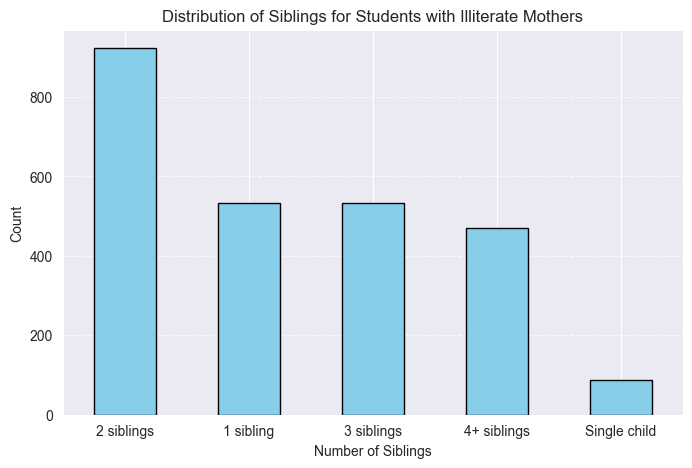

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_68399/2200528058.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_students["Better_than_Avg"] = degree_students["Science.."] > degree_students["Overall_Age_Avg"]


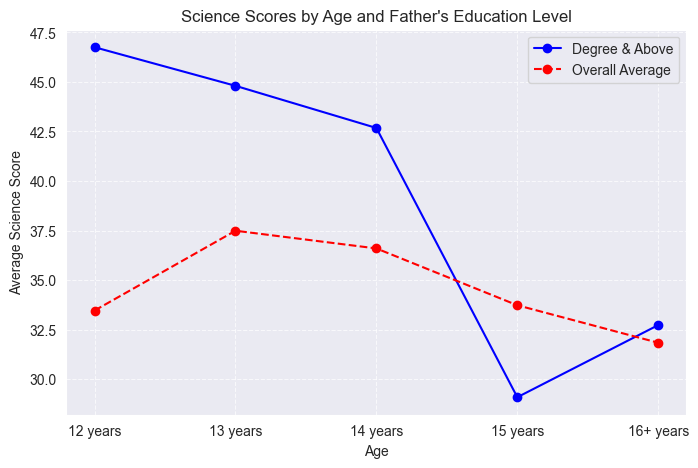

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "nas.csv"  # Update with your file path
df = pd.read_csv(file_path)

### Plot 1: Distribution of Siblings for Students with Illiterate Mothers ###

# Filter dataset for students whose mothers are illiterate
illiterate_mothers_df = df[df["Mother.edu"] == "Illiterate"]

# Get the distribution of the number of siblings
siblings_distribution = illiterate_mothers_df["Siblings"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
siblings_distribution.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Siblings for Students with Illiterate Mothers")
plt.xlabel("Number of Siblings")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Plot 2: Science Scores by Age and Father's Education Level ###

# Filter out students aged 11 years
df_filtered = df[df["Age"] != "11 years"]

# Convert Science scores to numeric values, ignoring NaNs
df_filtered["Science.."] = pd.to_numeric(df_filtered["Science.."], errors='coerce')

# Group by Age and Father's Education, calculating the mean Science score
science_avg_by_age_father_edu = df_filtered.groupby(["Age", "Father.edu"])["Science.."].mean().reset_index()

# Calculate overall average Science score by age
overall_avg_by_age = df_filtered.groupby("Age")["Science.."].mean().reset_index()
overall_avg_by_age = overall_avg_by_age.rename(columns={"Science..": "Overall_Age_Avg"})

# Merge with our grouped data
science_comparison = science_avg_by_age_father_edu.merge(overall_avg_by_age, on="Age")

# Compare performance of students whose fathers have "Degree & above"
degree_students = science_comparison[science_comparison["Father.edu"] == "Degree & above"]

# Identify which age groups these students perform significantly better than the average
degree_students["Better_than_Avg"] = degree_students["Science.."] > degree_students["Overall_Age_Avg"]

# Create a line plot comparing Science scores
plt.figure(figsize=(8, 5))
plt.plot(degree_students["Age"], degree_students["Science.."], marker="o", linestyle="-", label="Degree & Above", color="blue")
plt.plot(degree_students["Age"], degree_students["Overall_Age_Avg"], marker="o", linestyle="--", label="Overall Average", color="red")

plt.title("Science Scores by Age and Father's Education Level")
plt.xlabel("Age")
plt.ylabel("Average Science Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()